## Problema No. 2:

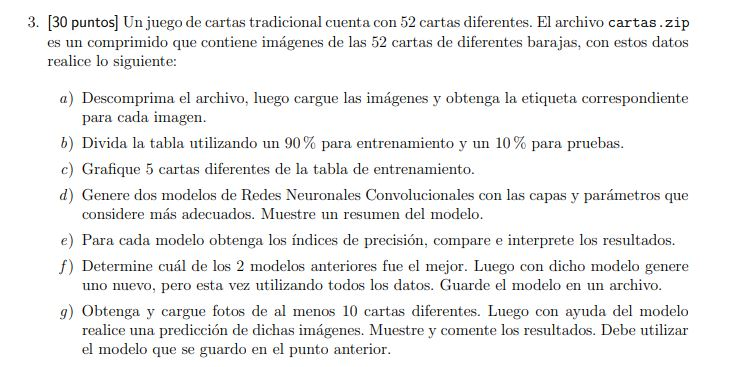

##### Importamos las librerias necesarias

In [7]:
import os
import re
import cv2
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import LeakyReLU

In [8]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria = pd.DataFrame(MC.diagonal() / np.sum(MC, axis = 1)).T
    if nombres != None:
        precision_categoria.columns = nombres
  
    return {
    "Matriz de Confusión" : MC,
    "Precisión Global" : precision_global,
    "Error Global" : error_global,
    "Precisión por categoría" : precision_categoria}

### a)

#### Cargar imágenes

In [9]:
labels = []
imagenes = []
ruta = "C:/Users/jcortes/cartas/"

for carpeta in next(os.walk(ruta))[1]:
    
    for archivo in next(os.walk(ruta + carpeta))[2]:
        
        if re.search("\\.(jpg|jpeg|png|bmp|tiff)$", archivo):
            
            try:
                img = cv2.imread(ruta + carpeta + '/' + archivo)
                img = cv2.resize(img, (64, 64))
                imagenes.append(img)
                labels.append(carpeta)
            except:
                    print("No se pudo cargar la imagen: " + archivo + " en la carpeta: " + carpeta)

In [10]:
X = np.array(imagenes, dtype = np.int64)
y = np.array(labels)

In [11]:
display(X.shape,X.ndim)

(7509, 64, 64, 3)

4

Esto nos indica que tenemos un tensor de dimensión 4 el cuál esta compuesto por matrices de 64 filas por 3 columnas, cada elemento del tensor esta compuesto por 64 matrices de la dimension mencionada (64 filas, 3 columnas) y el tensor contiene 7509 de estos elementos.

In [12]:
X

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[  7,  12,  13],
         [  7,  12,  13],
         [  7,  12,  13],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 11,  15,  16],
         [ 11,  15,  16],
         [  8,  12,  13],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[252, 254, 254],
         [252, 254, 254],
         [189, 192, 192],
         ...,
         [255, 255, 255],
        

In [13]:
print(
  'Total de individuos: ', len(X),
  '\nNúmero total de salidas: ', len(np.unique(y)), 
  '\nClases de salida: ', np.unique(y))

Total de individuos:  7509 
Número total de salidas:  52 
Clases de salida:  ['ace of clubs' 'ace of diamonds' 'ace of hearts' 'ace of spades'
 'eight of clubs' 'eight of diamonds' 'eight of hearts' 'eight of spades'
 'five of clubs' 'five of diamonds' 'five of hearts' 'five of spades'
 'four of clubs' 'four of diamonds' 'four of hearts' 'four of spades'
 'jack of clubs' 'jack of diamonds' 'jack of hearts' 'jack of spades'
 'king of clubs' 'king of diamonds' 'king of hearts' 'king of spades'
 'nine of clubs' 'nine of diamonds' 'nine of hearts' 'nine of spades'
 'queen of clubs' 'queen of diamonds' 'queen of hearts' 'queen of spades'
 'seven of clubs' 'seven of diamonds' 'seven of hearts' 'seven of spades'
 'six of clubs' 'six of diamonds' 'six of hearts' 'six of spades'
 'ten of clubs' 'ten of diamonds' 'ten of hearts' 'ten of spades'
 'three of clubs' 'three of diamonds' 'three of hearts' 'three of spades'
 'two of clubs' 'two of diamonds' 'two of hearts' 'two of spades']


### b)

#### Estandarizamos los datos

In [14]:
X = X / 255

#### Recodificamos la variable a predecir.

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
#y = to_categorical(y)

In [16]:
y

array([ 0,  0,  0, ..., 51, 51, 51], dtype=int64)

In [17]:
encoder.classes_

array(['ace of clubs', 'ace of diamonds', 'ace of hearts',
       'ace of spades', 'eight of clubs', 'eight of diamonds',
       'eight of hearts', 'eight of spades', 'five of clubs',
       'five of diamonds', 'five of hearts', 'five of spades',
       'four of clubs', 'four of diamonds', 'four of hearts',
       'four of spades', 'jack of clubs', 'jack of diamonds',
       'jack of hearts', 'jack of spades', 'king of clubs',
       'king of diamonds', 'king of hearts', 'king of spades',
       'nine of clubs', 'nine of diamonds', 'nine of hearts',
       'nine of spades', 'queen of clubs', 'queen of diamonds',
       'queen of hearts', 'queen of spades', 'seven of clubs',
       'seven of diamonds', 'seven of hearts', 'seven of spades',
       'six of clubs', 'six of diamonds', 'six of hearts',
       'six of spades', 'ten of clubs', 'ten of diamonds',
       'ten of hearts', 'ten of spades', 'three of clubs',
       'three of diamonds', 'three of hearts', 'three of spades',
       '

#### Dividimos en entrenamiento y prueba

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.90)

### c)

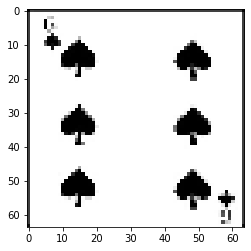

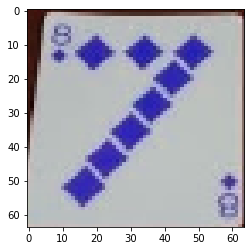

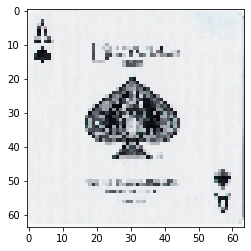

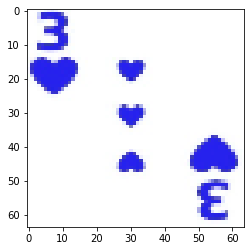

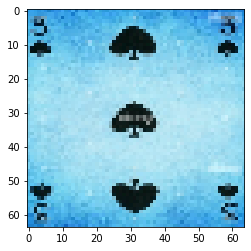

In [19]:
for k in range(5):
    plt.imshow(x_train[k])
    plt.show()

### d)

In [20]:
modelo_cartas_1 = Sequential()

modelo_cartas_1.add(
  Conv2D(64, kernel_size = (3, 3), activation = 'linear',
         padding = 'same', input_shape = (64, 64, 3)))

modelo_cartas_1.add(LeakyReLU(alpha = 0.1))
modelo_cartas_1.add(MaxPooling2D((2, 2), padding = 'same'))
modelo_cartas_1.add(Dropout(0.5))
 
modelo_cartas_1.add(Flatten())
modelo_cartas_1.add(Dense(32, activation = 'linear'))
modelo_cartas_1.add(LeakyReLU(alpha = 0.1))
modelo_cartas_1.add(Dropout(0.5))

modelo_cartas_1.add(Dense(len(np.unique(y)), activation = 'softmax'))
 
modelo_cartas_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 32)                2097184   
                                                        

In [21]:
modelo_cartas_1.compile(loss = "sparse_categorical_crossentropy",
                     optimizer = "adam", metrics = 'accuracy')

In [22]:
modelo_cartas_1.fit(x_train, y_train, batch_size = 64,
                epochs = 50, verbose = 1)

Epoch 1/50
106/106 [==============================] - 18s 166ms/step - loss: 3.7960 - accuracy: 0.0764
Epoch 2/50
106/106 [==============================] - 20s 191ms/step - loss: 2.9867 - accuracy: 0.2168
Epoch 3/50
106/106 [==============================] - 20s 192ms/step - loss: 2.5590 - accuracy: 0.3019
Epoch 4/50
106/106 [==============================] - 20s 191ms/step - loss: 2.2792 - accuracy: 0.3778
Epoch 5/50
106/106 [==============================] - 24s 222ms/step - loss: 2.0705 - accuracy: 0.4143
Epoch 6/50
106/106 [==============================] - 22s 205ms/step - loss: 1.9060 - accuracy: 0.4528
Epoch 7/50
106/106 [==============================] - 23s 217ms/step - loss: 1.7750 - accuracy: 0.4889
Epoch 8/50
106/106 [==============================] - 23s 215ms/step - loss: 1.6471 - accuracy: 0.5191
Epoch 9/50
106/106 [==============================] - 22s 203ms/step - loss: 1.5707 - accuracy: 0.5426
Epoch 10/50
106/106 [==============================] - 23s 213ms/step - l

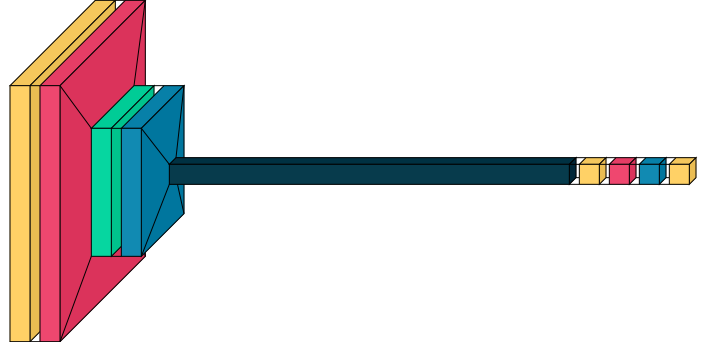

In [23]:
import visualkeras
visualkeras.layered_view(modelo_cartas_1).show() # display using your system viewer
visualkeras.layered_view(modelo_cartas_1, to_file='output.png') # write to disk
visualkeras.layered_view(modelo_cartas_1, to_file='output.png').show() # write and show

visualkeras.layered_view(modelo_cartas_1)

In [25]:
pred = modelo_cartas_1.predict(x_test)

24/24 [==============================] - 1s 21ms/step


In [26]:
pred = np.argmax(pred, axis = 1)
pred = encoder.inverse_transform(pred)
pred

array(['jack of clubs', 'ten of spades', 'king of diamonds',
       'ten of diamonds', 'jack of diamonds', 'king of hearts',
       'jack of clubs', 'jack of diamonds', 'king of spades',
       'jack of clubs', 'eight of hearts', 'eight of diamonds',
       'king of clubs', 'two of hearts', 'king of hearts',
       'jack of spades', 'ten of clubs', 'king of hearts',
       'nine of spades', 'six of clubs', 'queen of clubs',
       'king of diamonds', 'king of diamonds', 'three of spades',
       'ace of hearts', 'jack of spades', 'seven of hearts',
       'jack of clubs', 'six of spades', 'six of clubs',
       'four of diamonds', 'five of spades', 'two of hearts',
       'king of clubs', 'three of diamonds', 'king of diamonds',
       'king of hearts', 'nine of spades', 'ace of hearts',
       'six of diamonds', 'jack of clubs', 'five of diamonds',
       'two of spades', 'four of clubs', 'eight of diamonds',
       'jack of diamonds', 'four of spades', 'four of clubs',
       'six of

In [27]:

y_test2 = encoder.inverse_transform(y_test)

MC = confusion_matrix(y_test2, pred, labels = encoder.classes_)
indices = indices_general(MC, list(encoder.classes_))
for k in indices:
      print("\n%s:\n%s" % (k, str(indices[k])))


Matriz de Confusión:
[[ 5  0  0 ...  0  0  0]
 [ 0 10  4 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  1  1 ... 10  1  1]
 [ 0  0  1 ...  1  7  0]
 [ 0  0  0 ...  0  0 10]]

Precisión Global:
0.59254327563249

Error Global:
0.40745672436751

Precisión por categoría:
   ace of clubs  ace of diamonds  ace of hearts  ace of spades  \
0      0.555556         0.714286       0.777778         0.6875   

   eight of clubs  eight of diamonds  eight of hearts  eight of spades  \
0        0.214286           0.545455         0.761905         0.611111   

   five of clubs  five of diamonds  ...  ten of hearts  ten of spades  \
0       0.666667          0.769231  ...          0.625       0.785714   

   three of clubs  three of diamonds  three of hearts  three of spades  \
0        0.272727           0.666667              0.8         0.692308   

   two of clubs  two of diamonds  two of hearts  two of spades  
0           0.5         0.555556       0.538462       0.555556  

[1 rows x 52 column

#### d.2)

In [30]:
modelo_cartas_2 = Sequential()

modelo_cartas_2.add(
  Conv2D(64, kernel_size = (4, 4), activation = 'relu',
         padding = 'same', input_shape = (64, 64, 3)))

modelo_cartas_2.add(LeakyReLU(alpha = 0.1))
modelo_cartas_2.add(MaxPooling2D((3, 3), padding = 'same'))
modelo_cartas_2.add(Dropout(0.3))
 
modelo_cartas_2.add(Flatten())
modelo_cartas_2.add(Dense(60, activation = 'relu'))
modelo_cartas_2.add(LeakyReLU(alpha = 0.1))
modelo_cartas_2.add(Dropout(0.3))

modelo_cartas_2.add(Dense(len(np.unique(y)), activation = 'softmax'))
 
modelo_cartas_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        3136      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_2 (Dense)             (None, 60)                1858620   
                                                      

In [32]:
modelo_cartas_2.compile(loss = "sparse_categorical_crossentropy",
                     optimizer = "adam", metrics = 'accuracy')

In [33]:
modelo_cartas_2.fit(x_train, y_train, batch_size = 32,
                epochs = 40, verbose = 0)

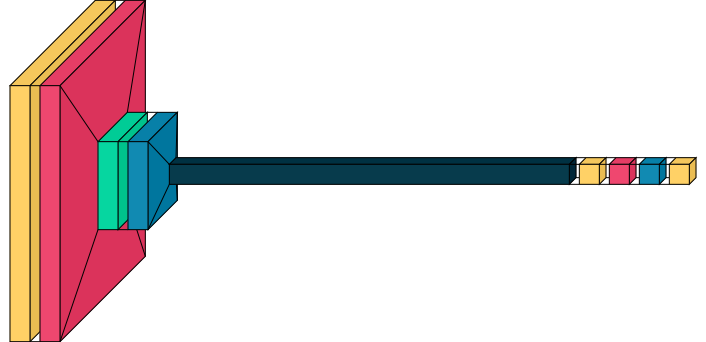

In [34]:
import visualkeras
visualkeras.layered_view(modelo_cartas_2).show() # display using your system viewer
visualkeras.layered_view(modelo_cartas_2, to_file='output2.png') # write to disk
visualkeras.layered_view(modelo_cartas_2, to_file='output2.png').show() # write and show

visualkeras.layered_view(modelo_cartas_2)

In [37]:
pred2 = modelo_cartas_2.predict(x_test)
pred2 = np.argmax(pred2, axis = 1)
pred2 = encoder.inverse_transform(pred2)
pred2

24/24 [==============================] - 1s 21ms/step


array(['ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', 'ace of spades', 'ace of spades', 'ace of spades',
       'ace of spades', '

In [38]:



MC = confusion_matrix(y_test2, pred2, labels = encoder.classes_)
indices = indices_general(MC, list(encoder.classes_))
for k in indices:
      print("\n%s:\n%s" % (k, str(indices[k])))


Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Precisión Global:
0.02130492676431425

Error Global:
0.9786950732356857

Precisión por categoría:
   ace of clubs  ace of diamonds  ace of hearts  ace of spades  \
0           0.0              0.0            0.0            1.0   

   eight of clubs  eight of diamonds  eight of hearts  eight of spades  \
0             0.0                0.0              0.0              0.0   

   five of clubs  five of diamonds  ...  ten of hearts  ten of spades  \
0            0.0               0.0  ...            0.0            0.0   

   three of clubs  three of diamonds  three of hearts  three of spades  \
0             0.0                0.0              0.0              0.0   

   two of clubs  two of diamonds  two of hearts  two of spades  
0           0.0              0.0            0.0            0.0  

[1 rows x 52 columns]


#### e)

Se puede determinar que el modelo 1 generado es el mejor debido a que el segundo no pronóstico otra categoría diferente al as de espadas

#### f)

In [39]:
modelo_cartas_1.fit(X, y, batch_size = 64,
                epochs = 50, verbose = 0)

In [40]:
modelo_cartas_1.save("cnn_cartas.h5py")

INFO:tensorflow:Assets written to: cnn_cartas.h5py\assets


INFO:tensorflow:Assets written to: cnn_cartas.h5py\assets


#### g)

#### Predicción de individuos nuevos

In [41]:
from tensorflow.keras.models import load_model

modelo_cartas = load_model('cnn_cartas.h5py')

In [42]:
from urllib.request import Request, urlopen

def cargar_imagen_url(url):
    
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    response = urlopen(req)
    arr = np.asarray(bytearray(response.read()), dtype = np.uint8)
    img = cv2.imdecode(arr, -1)
    return img

In [58]:
from urllib.request import Request, urlopen

img_1 = cargar_imagen_url('https://th.bing.com/th/id/OIP.-eRABh9w4HuWDiUalAT8bQAAAA?pid=ImgDetMain')
img_2 = cargar_imagen_url('https://i.pinimg.com/736x/eb/14/83/eb148317af793131ea13996e3b1ebb5a.jpg')
img_3 = cargar_imagen_url('https://us.123rf.com/450wm/yupiramos/yupiramos1711/yupiramos171118106/90167729-%C3%A1s-de-copas-franc%C3%AAs-jogando-cartas-relacionados-%C3%ADcone-imagem-vector-ilustra%C3%A7%C3%A3o-design.jpg')
img_4 = cargar_imagen_url('https://w7.pngwing.com/pngs/783/160/png-transparent-playing-card-suit-standard-52-card-deck-card-game-ace-card-hearts-joker-spades.png')
img_5 = cargar_imagen_url('https://c0.klipartz.com/pngpicture/742/114/gratis-png-juego-de-naipes-as-de-corazones-naipes-de-corazones-thumbnail.png')
imgs_nuevas = [img_1, img_2, img_3, img_4,img_5]

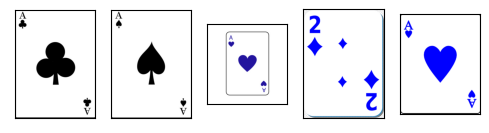

In [59]:
fig, ax = plt.subplots(1, 5, figsize = (6, 6), dpi=100)
for i, axi in enumerate(ax.flat):
    
    no_print = axi.imshow(imgs_nuevas[i])
    no_print = axi.set(xticks = [], yticks = [])
plt.show()

#### Aplicamos la misma transformación realizada en el entrenamiento de la red

In [60]:
imgs_nuevas = [cv2.resize(img, (64, 64)) for img in imgs_nuevas]
imgs_nuevas = np.array(imgs_nuevas, dtype = np.int64)
imgs_nuevas = imgs_nuevas / 255

#### Predicción de los nuevos individuos

In [61]:
pred3 = modelo_cartas.predict(imgs_nuevas)

1/1 [==============================] - 0s 31ms/step


In [62]:
pred3 = np.argmax(pred3, axis = 1)
pred3 = encoder.inverse_transform(pred3)
pred3

array(['ace of clubs', 'ace of spades', 'five of diamonds',
       'two of diamonds', 'ace of hearts'], dtype='<U17')

El modelo predijo bien 4 de las 5 imágenes cargadas, la única que no pudo clasificar se debe a que no esta bien mostrada la imagen.

In [63]:
from urllib.request import Request, urlopen

img_1 = cargar_imagen_url('https://w7.pngwing.com/pngs/620/80/png-transparent-playing-card-ace-of-spades-standard-52-card-deck-suit-spades-game-text-heart.png')
img_2 = cargar_imagen_url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcShVSEBTXB2fKmMRkThbxEpzhhe-oxrhwYTFVcwQzKFhp_sPp7JS4TXOH_O401I0PQQdmg&usqp=CAU')
img_3 = cargar_imagen_url('https://th.bing.com/th/id/OIP.gJg2t3HjHj4Uwp4fGLkl9gAAAA?pid=ImgDetMain')
img_4 = cargar_imagen_url('https://th.bing.com/th/id/OIP.ptkgvxO1fMXYsT1L7Ex4lAAAAA?pid=ImgDetMain')

imgs_nuevas2 = [img_1, img_2, img_3, img_4]

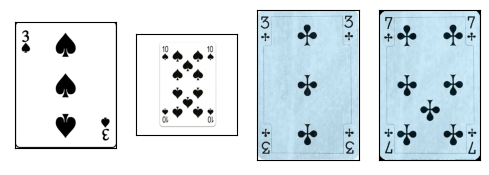

In [64]:
fig, ax = plt.subplots(1, 4, figsize = (6, 6), dpi=100)
for i, axi in enumerate(ax.flat):
    
    no_print = axi.imshow(imgs_nuevas2[i])
    no_print = axi.set(xticks = [], yticks = [])
plt.show()

In [65]:
imgs_nuevas2 = [cv2.resize(img, (64, 64)) for img in imgs_nuevas2]
imgs_nuevas2 = np.array(imgs_nuevas2, dtype = np.int64)
imgs_nuevas2 = imgs_nuevas2 / 255

In [66]:
pred4 = modelo_cartas.predict(imgs_nuevas2)

1/1 [==============================] - 0s 24ms/step


In [67]:
pred4 = np.argmax(pred4, axis = 1)
pred4 = encoder.inverse_transform(pred4)
pred4

array(['three of spades', 'four of clubs', 'three of clubs',
       'seven of clubs'], dtype='<U17')